
Importing all libraries

In [6]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import copy
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow


# EXPLORING THE DATA SET

(10,)

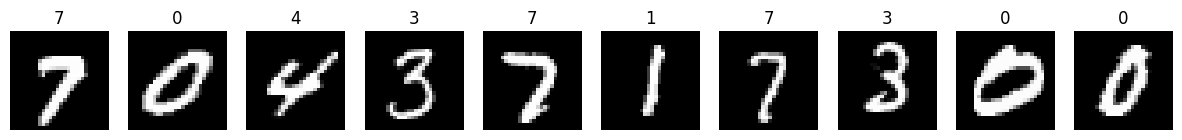

In [17]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

# Visualising the first 10 images
from matplotlib import pyplot
import numpy as np
# Generate a list of 10 random numbers from 1 to 70,000
random_numbers = np.random.randint(1, 60001, size=10)

for i in range(10):
    axes[i].imshow(X_train[random_numbers[i]], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(y_train[random_numbers[i]]))

plt.show()

# Setting a batch size

In [52]:
numb_batch = 64

# Getting The Data

In [18]:
X_train = X_train / 255
X_test = X_test / 255
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [21]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tensorflow.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2717 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1230 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0852 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9845


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9709


[0.0917440801858902, 0.9708999991416931]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    1,    1,    4,    1,    5,    1],
       [   0, 1111,    3,    1,    0,    1,    1,    0,   18,    0],
       [   1,    0, 1008,    1,    4,    0,    2,    3,   13,    0],
       [   0,    0,    5,  987,    0,    0,    0,    5,   11,    2],
       [   0,    0,    3,    1,  959,    0,    3,    5,    2,    9],
       [   3,    0,    0,   16,    1,  852,    4,    1,   13,    2],
       [   2,    3,    3,    0,    5,    8,  933,    0,    4,    0],
       [   2,    5,   10,    5,    2,    0,    0,  993,    6,    5],
       [   4,    0,    3,    3,    2,    0,    3,    2,  956,    1],
       [   3,    3,    2,   10,   16,    1,    0,    8,   22,  944]])>

Text(95.72222222222221, 0.5, 'Truth')

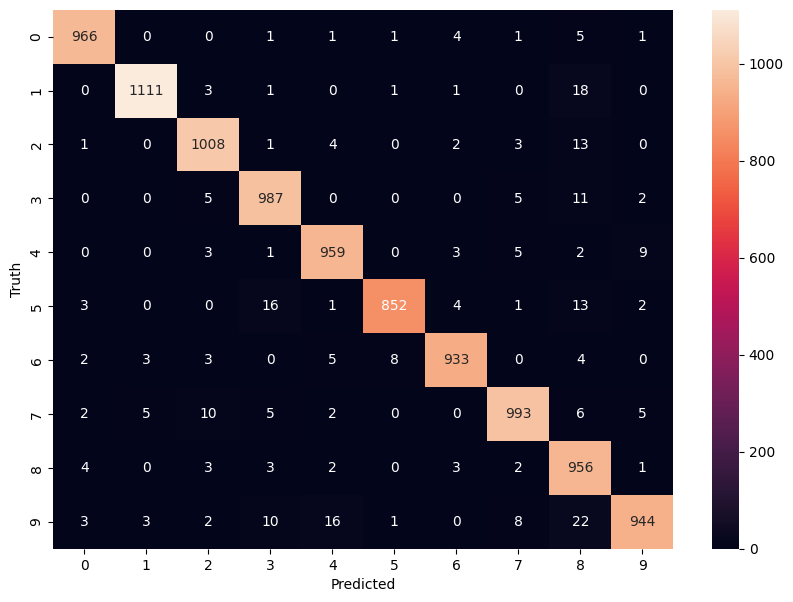

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(28, 28)),
    tensorflow.keras.layers.Dense(100, activation='relu'),
    tensorflow.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2666 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1213 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0679 - accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9761


[0.08778610825538635, 0.9761000275611877]

Looking at the numbers which have been classified incorrectly

313/313 [==============================] - 0s 1ms/step


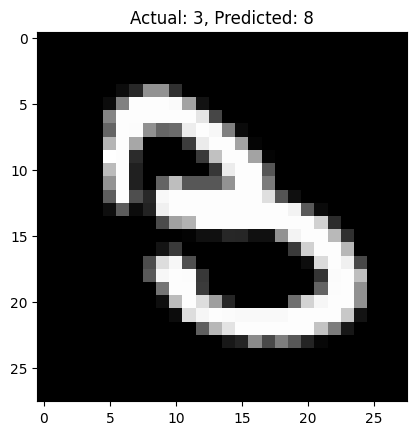

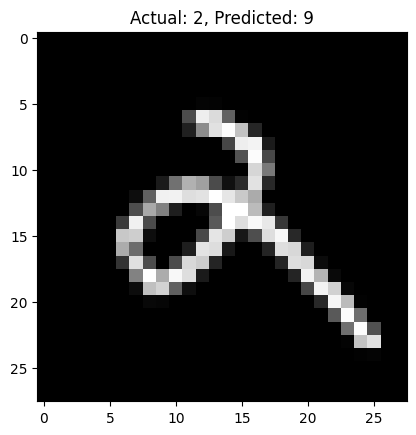

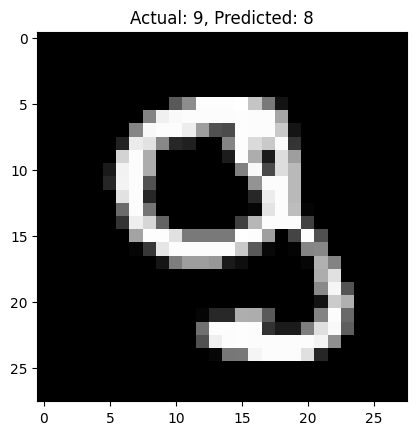

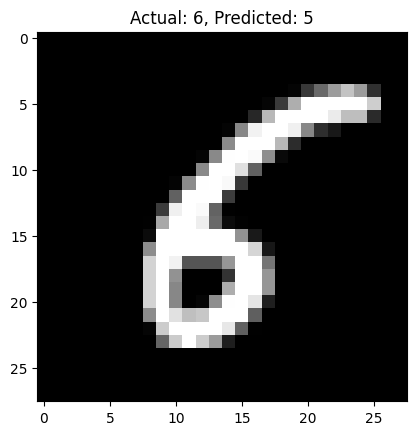

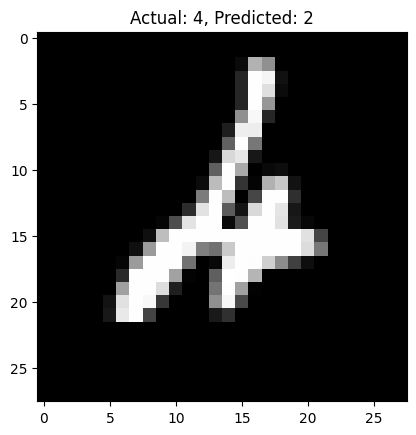

In [30]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert one-hot encoded labels to integers (if needed)
predicted_labels = np.argmax(predictions, axis=1)

# Identify misclassified indices
misclassified_indices = np.where(predicted_labels != y_test)[0]

# Visualize some misclassified images
num_samples_to_visualize = 5
for i in range(min(num_samples_to_visualize, len(misclassified_indices))):
    index = misclassified_indices[i]

    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {y_test[index]}, Predicted: {predicted_labels[index]}')
    plt.show()